# K-Means Algorithm.
# Submitted by: Vemula Manohar Reddy
# Date: -3/22/2017
# Program description:
    The following steps are performed in K-means clustering process:
    Initialize k cluster centroids repeat the following:
    for each point, compute which centroid is nearest to it
    for each centroid, move its location to the mean location of the points assigned to it

In [2]:
#imports
import csv
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import random
import math

In [3]:
def initial_centroids(points,k):
    initial_cen = [[] for i in range(k)]
    for i in range(k):
        r = random.randint(0,len(points)-1)
        initial_cen[i] = points[r]
    return initial_cen

In [4]:
def distance(a,b):
    return math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

In [5]:
def assign_clusters(points,centroid,k):
    cluster = [[] for i in range(k)]
    dist = [[] for i in range(len(points))]
    for i in range(len(points)):
        for j in range(k):
            d = distance(points[i],centroid[j])
            dist[i].append(d)
    for i in range(len(points)):
        n = dist[i].index(min(dist[i]))
        cluster[n].append(points[i])
    return cluster

In [6]:
def update_centroid(cluster,k):
    update_cen = [[] for i in range(k)]
    for i in range(k):
        s1 = 0
        s2 = 0
        l = len(cluster[i])
        if(l==1):
            s1+= cluster[i][0][0]
            s2+= cluster[i][0][1]
        else:
            for j in range(l):
                s1+= cluster[i][j][0]
                s2+= cluster[i][j][1]
        s1 = (float(s1)/l)
        s2 = (float(s2)/l)
        update_cen[i] = [s1,s2]
    return update_cen

Enter the value of K:4
Enter the dataset: 1 or 22
Randaomly selected centroid is: [(10, 10), (10, 6), (1, 7), (4, 8)]

Iteration: 1
Cluster: 0 [(8, 8), (10, 10), (18, 22)]

Cluster: 1 [(6, 2), (7, 6), (9, 1), (10, 4), (10, 6), (12, 2)]

Cluster: 2 [(1, 1), (1, 7), (3, 3)]

Cluster: 3 [(3, 9), (4, 6), (4, 8), (5, 5)]



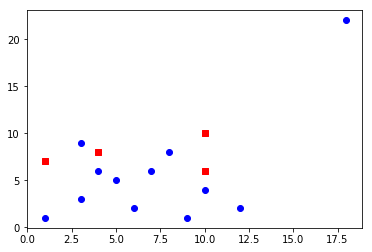

Updated centroid is: [[12.0, 13.333333333333334], [9.0, 3.5], [1.6666666666666667, 3.6666666666666665], [4.0, 7.0]]

Iteration:  2


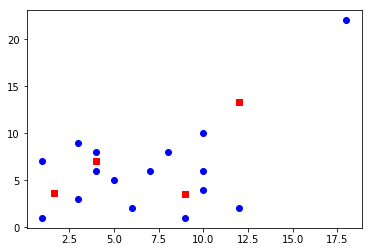

Cluster: 0 [(10, 10), (18, 22)]

Cluster: 1 [(6, 2), (9, 1), (10, 4), (10, 6), (12, 2)]

Cluster: 2 [(1, 1), (3, 3)]

Cluster: 3 [(1, 7), (3, 9), (4, 6), (4, 8), (5, 5), (7, 6), (8, 8)]

Updated centroid is: [[14.0, 16.0], [9.4, 3.0], [2.0, 2.0], [4.571428571428571, 7.0]]

Iteration:  3


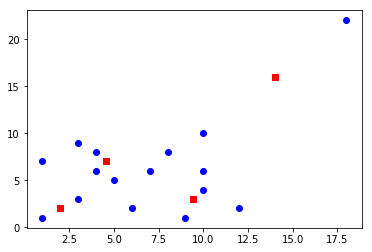

Cluster: 0 [(18, 22)]

Cluster: 1 [(6, 2), (9, 1), (10, 4), (10, 6), (12, 2)]

Cluster: 2 [(1, 1), (3, 3)]

Cluster: 3 [(1, 7), (3, 9), (4, 6), (4, 8), (5, 5), (7, 6), (8, 8), (10, 10)]

Updated centroid is: [[18.0, 22.0], [9.4, 3.0], [2.0, 2.0], [5.25, 7.375]]

Iteration:  4


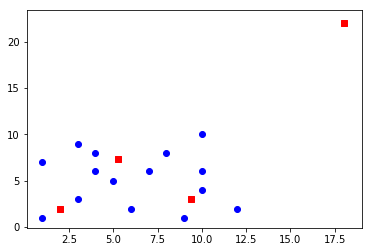

Cluster: 0 [(18, 22)]

Cluster: 1 [(6, 2), (9, 1), (10, 4), (10, 6), (12, 2)]

Cluster: 2 [(1, 1), (3, 3)]

Cluster: 3 [(1, 7), (3, 9), (4, 6), (4, 8), (5, 5), (7, 6), (8, 8), (10, 10)]

Updated centroid is: [[18.0, 22.0], [9.4, 3.0], [2.0, 2.0], [5.25, 7.375]]

Centroids matched


In [17]:
# k-means function
# data set
k = int(input("Enter the value of K:"))
dset = int(input("Enter the dataset: 1 or 2"))
if(dset==1):
    data = pd.read_csv('data.csv')
elif(dset==2):
    data = pd.read_csv('data2.csv')
x = list(data.X)
y = list(data.Y)
points = [() for i in range(len(x))]
for i in range(len(x)):
        points[i]=(x[i],y[i])
cent = initial_centroids(points,k)
cluster = assign_clusters(points,cent,k)
print "Randaomly selected centroid is:",cent
print
print "Iteration: 1"
for loop in range(k):
    print 'Cluster:',loop,cluster[loop]
    print("")
plt.scatter(*(zip(*points)),color='blue')
for i in range(k):
    plt.scatter(cent[i][0],cent[i][1],color='red',marker='s')
plt.show()
cent_new = update_centroid(cluster,k)
print "Updated centroid is:", cent_new
print
m = 2
while(cent_new != cent):
    new_cluster = assign_clusters(points,cent_new,k)
    print "Iteration: ", m
    m=m+1
    plt.scatter(*(zip(*points)),color='blue')
    for i in range(k):
        plt.scatter(cent_new[i][0],cent_new[i][1],color='red',marker='s')
    plt.show()
    for loop in range(k):
        print 'Cluster:',loop,new_cluster[loop]
        print("")
    cent = cent_new
    cent_new = update_centroid(new_cluster,k)
    print"Updated centroid is:", cent_new
    print
print"Centroids matched"